# Simple Linear Regression with Numpy

In [92]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [93]:
np.random.seed(0) # to always reproduce the same dataset
# Generate a random regression problem.
x,y =make_regression(n_samples=100, n_features=1, noise=10)

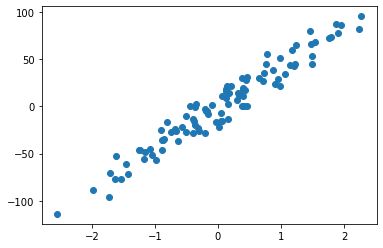

In [94]:
plt.scatter(x,y)

In [95]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [96]:
y=y.reshape(y.shape[0],1)

In [97]:
y.shape

(100, 1)

In [98]:
X=np.hstack((x,np.ones(x.shape))) #Creation of the matrix X which contains the Bias column.

In [99]:
Theta=np.random.randn(2,1) #Creation of a parameter vector, initialized with random coefficients.
Theta.shape

(2, 1)

In [100]:
def model(X,Theta):
    return X.dot(Theta)

# Linear Model 

In [101]:
def model(X, Theta):
    return X.dot(Theta) # We implement our model: F= X* Theta

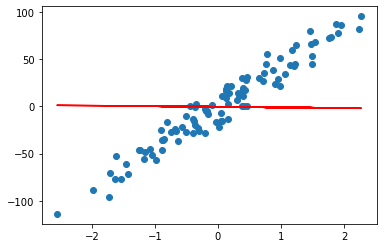

In [102]:
plt.scatter(x,y)
plt.plot(x, model(X,Theta), c='r')

## Loss Function: Mean Squared Error (MSE)

In [104]:
def cost_function(X,y,Theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,Theta)-y)**2) 

In [105]:
cost_function(X,y,Theta)# mesure the MSE

1009.8259477174702

## Gradients and Gradient Descent

In [106]:
def grad(X,y,Theta):
    return 1/len(y)*X.T.dot(model(X,Theta)-y) # We implement the gradient formula for the MSE

In [107]:
def gradient_descent(X,y,Theta, learning_rate, n_iterations):
    cost_hist=np.zeros(n_iterations)
    for i in range (0, n_iterations):
        Theta=Theta-learning_rate*grad(X,y,Theta)
        cost_hist[i]=cost_function(X,y,Theta)
    return Theta, cost_hist

## Training

In [108]:
# We define a number of iterations, as well as a learning step
n_iterations = 1000
learning_rate = 0.01
Theta_final, cost_hist=gradient_descent(X,y,Theta, learning_rate, n_iterations)

In [109]:
# creation of a prediction vector which contains the predictions of our final model
predictions=  model(X,Theta_final)

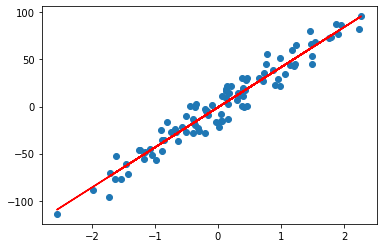

In [110]:
# Displays the prediction results (in red) compared to our Dataset (in blue)
plt.scatter(x,y)
plt.plot(x, predictions,c='r')

# Learning Curve

To check if our Gradient Descent algorithm worked well, we observe the evolution of the cost function through the iterations. We are supposed to obtain a curve which decreases with each iteration until it stagnates at a minimum level (close to zero). If the curve does not follow this pattern, then the learning_rate step may be too high, it is necessary to take a lower step.

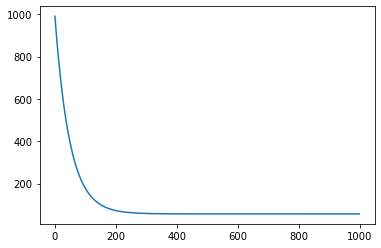

In [111]:
plt.plot(range(1000),cost_hist)

## Final Step

In [112]:
def coeff_determination(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

In [113]:
coeff_determination(y, predictions)

0.9417294704806692